<a href="https://colab.research.google.com/github/nkanungo/EVA6/blob/main/MNIST_Pytorch_S4_Relu_BN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the required Libraries 

In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

Typical Structure 
=====================
1. Convolution Layer of 3 x 3 Kernel with Padding of 1 
2. ReLu
3. Maxpool 

Additional Structures
======================
1. Convolution Layer of 1 x 1 Kernel to consolidate without convolution 
2. Global Average Pooling 

Target: 
======

In this step

1. I have choosen vanilla architecture of 6 convolution layer and 2 transtion blocks (maxpool) but reduced the number of channels to keep the number of paramaters less
2. Used GAP in the the last layer. 
3. My target is to achieve near 99% validation accuracy with less than 10,000 parameters
4. Once I avhieve this , the I can refine the model further. 
5. Need to achieve the above accuracy within 15 epochs

Result: 
======
1. Observed Train accuracy: 98.96%
2. Validation accuracy:98.9%
3. Number of parameters: 8,442


Analysis: 
========

1. As expected validation accuracy has  reduced to 98.9% from the vanilla architecure with accuracy 99.23 but almost near to what I would call a candidate for tuning 
2. This reduction in accuracy is for the reduction in number of parameters. But unlike vanilla architecture, the difference between Train Accuray and Validation accuracy is very less, which means it is not overfitting. 
3. Also, number of parameters 8442 is well within my target of 10K parameters


In [2]:
from model import model2 as Net

Steps
========
1. Install Torch Summary
2. Print Summary of model

In [3]:
from model import print_model_summary
dropout_prob = 0.1
inputsize= (1, 28, 28)
print_model_summary(dropout_prob, inputsize, Net)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 14, 28, 28]             126
              ReLU-2           [-1, 14, 28, 28]               0
            Conv2d-3           [-1, 14, 28, 28]           1,764
              ReLU-4           [-1, 14, 28, 28]               0
         MaxPool2d-5           [-1, 14, 14, 14]               0
            Conv2d-6           [-1, 14, 14, 14]           1,764
              ReLU-7           [-1, 14, 14, 14]               0
            Conv2d-8           [-1, 14, 14, 14]           1,764
              ReLU-9           [-1, 14, 14, 14]               0
        MaxPool2d-10             [-1, 14, 7, 7]               0
           Conv2d-11             [-1, 14, 5, 5]           1,764
             ReLU-12             [-1, 14, 5, 5]               0
           Conv2d-13             [-1, 10, 3, 3]           1,260
AdaptiveAvgPool2d-14             [-1, 1

G:\TSAI-ERA\Session 7\model.py:111: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Steps
=======
This is the most important step 
1. Define Train loader and Test loader with only 1 worker (MNSIT is easy dataset)
   - Normalize


In [4]:
#torch.manual_seed(1)
from dataset import get_train_loader, get_test_loader
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

batch_size = 128
kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = get_train_loader(batch_size, kwargs)
test_loader = get_test_loader(batch_size, kwargs)


Steps
=======
1. Define Lists to capture training parameters and testing parameters 


In [5]:
from tqdm import tqdm
from model import get_train, get_test

train_losses = []
test_losses = []
train_acc = []
test_acc = []   

Steps
=====
This is where the real action takes place

1. Define Learning rate and Optimizer 
2. Train for the defined epoch
3. Iterate over the training sample based on the defined batch size
4. Validate on test dataset
5. Capture outcome in the list
6. Validate 
7. Print the result


In [6]:
from torch.optim.lr_scheduler import StepLR

model =  Net(dropout_prob=0.1).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
#scheduler = StepLR(optimizer, step_size=6, gamma=0.1)
for epoch in range(1, 15):
    print('Currently Executing Epoch:', epoch)
    train_losses, train_acc = get_train(model, device, train_loader, optimizer, epoch,train_losses, train_acc)  
    test_losses, test_acc = get_test(model, device, test_loader,test_losses, test_acc)
    #scheduler.step()

Currently Executing Epoch: 1


Loss=0.36909249424934387 Batch_id=468 Accuracy=38.26: 100%|██████████████████████████| 469/469 [01:01<00:00,  7.65it/s]



Test set: Average loss: 0.2697, Accuracy: 9175/10000 (91.75%)

Currently Executing Epoch: 2


Loss=0.08057108521461487 Batch_id=468 Accuracy=94.33: 100%|██████████████████████████| 469/469 [00:59<00:00,  7.85it/s]



Test set: Average loss: 0.1043, Accuracy: 9674/10000 (96.74%)

Currently Executing Epoch: 3


Loss=0.11054106801748276 Batch_id=468 Accuracy=96.36: 100%|██████████████████████████| 469/469 [00:59<00:00,  7.85it/s]



Test set: Average loss: 0.0878, Accuracy: 9728/10000 (97.28%)

Currently Executing Epoch: 4


Loss=0.0943053737282753 Batch_id=468 Accuracy=97.41: 100%|███████████████████████████| 469/469 [00:59<00:00,  7.83it/s]



Test set: Average loss: 0.0660, Accuracy: 9781/10000 (97.81%)

Currently Executing Epoch: 5


Loss=0.15347643196582794 Batch_id=468 Accuracy=97.91: 100%|██████████████████████████| 469/469 [01:00<00:00,  7.78it/s]



Test set: Average loss: 0.0563, Accuracy: 9812/10000 (98.12%)

Currently Executing Epoch: 6


Loss=0.028397919610142708 Batch_id=468 Accuracy=98.08: 100%|█████████████████████████| 469/469 [00:59<00:00,  7.93it/s]



Test set: Average loss: 0.0529, Accuracy: 9830/10000 (98.30%)

Currently Executing Epoch: 7


Loss=0.010725519619882107 Batch_id=468 Accuracy=98.23: 100%|█████████████████████████| 469/469 [00:59<00:00,  7.94it/s]



Test set: Average loss: 0.0465, Accuracy: 9853/10000 (98.53%)

Currently Executing Epoch: 8


Loss=0.030114872381091118 Batch_id=468 Accuracy=98.32: 100%|█████████████████████████| 469/469 [00:56<00:00,  8.32it/s]



Test set: Average loss: 0.0552, Accuracy: 9815/10000 (98.15%)

Currently Executing Epoch: 9


Loss=0.04150071367621422 Batch_id=468 Accuracy=98.53: 100%|██████████████████████████| 469/469 [01:00<00:00,  7.81it/s]



Test set: Average loss: 0.0512, Accuracy: 9837/10000 (98.37%)

Currently Executing Epoch: 10


Loss=0.08408870548009872 Batch_id=468 Accuracy=98.72: 100%|██████████████████████████| 469/469 [00:58<00:00,  8.06it/s]



Test set: Average loss: 0.0424, Accuracy: 9845/10000 (98.45%)

Currently Executing Epoch: 11


Loss=0.002357091987505555 Batch_id=468 Accuracy=98.70: 100%|█████████████████████████| 469/469 [00:58<00:00,  7.99it/s]



Test set: Average loss: 0.0409, Accuracy: 9861/10000 (98.61%)

Currently Executing Epoch: 12


Loss=0.05522407963871956 Batch_id=468 Accuracy=98.86: 100%|██████████████████████████| 469/469 [01:05<00:00,  7.14it/s]



Test set: Average loss: 0.0423, Accuracy: 9871/10000 (98.71%)

Currently Executing Epoch: 13


Loss=0.03644769266247749 Batch_id=468 Accuracy=98.88: 100%|██████████████████████████| 469/469 [01:00<00:00,  7.81it/s]



Test set: Average loss: 0.0375, Accuracy: 9884/10000 (98.84%)

Currently Executing Epoch: 14


Loss=0.010155429132282734 Batch_id=468 Accuracy=98.96: 100%|█████████████████████████| 469/469 [00:58<00:00,  8.05it/s]



Test set: Average loss: 0.0358, Accuracy: 9890/10000 (98.90%)



Steps
====
Visualization of Training and Validation Parameters
   - Loss 
   - Accuracy
   

In [7]:
from utils import plot_loss

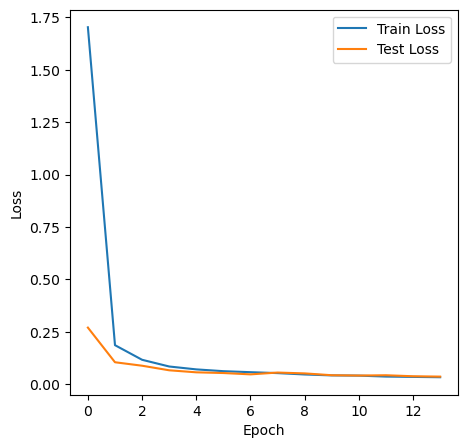

In [8]:
plot_loss(train_losses, test_losses)

In [9]:
from utils import plot_accuracy

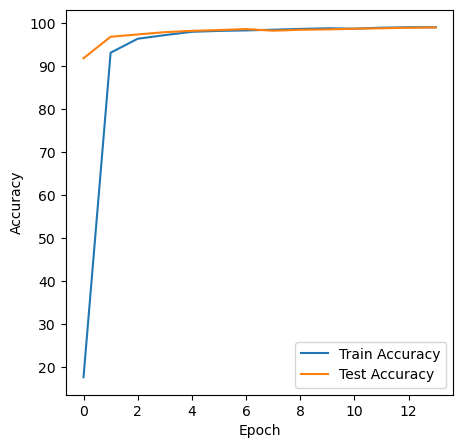

In [10]:
plot_accuracy(train_acc, test_acc)

Summary
=========
